<a href="https://colab.research.google.com/github/Wanghley/PIBIC-Strategies-Data-Visualization-Medicine/blob/master/Analysis%20and%20data%20processing%20-%20collection%202018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Work based in collected data by professor @oliveirafhm (Fábio Henrique Monteiro Oliveira) in his doctorate in 2018

### Dataset getter and preparation

In [0]:
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# link='https://drive.google.com/open?id=14Pi6FUcA7dfHnC_xjnZnThcylriKv5ob' #aparecido 1
# link='https://drive.google.com/open?id=1FDtC_t9fTk5VNl5GtV4jjWqRsO9hSLaU' #aparecido 2
link='https://drive.google.com/open?id=1BiF5VuTdlhVAV6iLedSu1zgmkVQ6EjKD' #aparecido 3
# link='https://drive.google.com/open?id=18IznFROWv8NeqFf7MK46J8oY2vL4C-vu' #rubens 1
# link = 'https://drive.google.com/open?id=1lJHAoKPBO9spx3SIROgZlpRScDm50jhj' #rubens 2
# link = 'https://drive.google.com/open?id=1jPaExv_AuTNPJHD7x310uHr70AKQi_O-' #rubens 3

In [0]:
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id})
patient = 'aparecido'#'rubens'
side = 'r'#'l'
ncollect = '03' 
downloaded.GetContentFile(patient+ncollect+side+'.csv')  
# Dataset is now stored in colab

In [0]:
import pandas as pd
import numpy as np

In [0]:
df_parkinsonian = pd.read_csv(patient+ncollect+side+'.csv')
df_parkinsonian.head()

,Time,G1X,G1Y,G1Z,G2X,G2Y,G2Z,G3X,G3Y,G3Z,G4X,G4Y,G4Z,A1X,A1Y,A1Z,A2X,A2Y,A2Z,A3X,A3Y,A3Z,A4X,A4Y,A4Z,M1X,M1Y,M1Z,M2X,M2Y,M2Z,M3X,M3Y,M3Z,M4X,M4Y,M4Z,EMG1,EMG2,PULSEA,PULSEB
0,0.00,-5.531395,-3.990234,3.959716,-2.204929,3.349355,-13.527123,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.357366,-0.523384,-1.133989,-0.354070,-0.273747,-0.840894,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.196139,-0.048920,-0.052827,0.158968,-0.140414,0.032319,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,4.647288,0.626230,0.825013,2.475038
1,0.02,-0.526436,23.353933,10.017548,-4.768444,6.477455,-5.973907,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.298039,-0.366766,-1.114580,-0.294133,-0.139101,-0.874586,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.196139,-0.049592,-0.051118,0.159091,-0.138033,0.025788,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.562066,2.902876,0.825013,2.475038
2,0.04,7.896544,45.174334,15.495537,1.777676,5.760281,-0.999466,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.239200,-0.333684,-1.007523,-0.288884,-0.131289,-0.856641,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.196139,-0.049592,-0.046662,0.158907,-0.136751,0.020783,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.342336,2.854047,0.825013,2.475038
3,0.06,5.439841,43.465324,14.412146,4.066529,5.714504,3.273060,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.183291,-0.345403,-0.851881,-0.304143,-0.096620,-0.895583,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.194369,-0.051179,-0.046662,0.159762,-0.137972,0.009979,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.216602,2.797894,0.825013,2.475038
4,0.08,10.643168,12.764172,0.404364,-4.676890,7.438773,7.545586,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.116030,-0.383124,-0.621164,-0.281193,-0.086122,-0.856275,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.193942,-0.050996,-0.044343,0.159335,-0.138582,0.017914,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.160449,2.783246,0.825013,2.475038


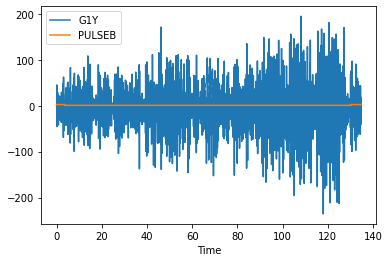

In [0]:
df_parkinsonian.plot(kind='line',x='Time',y=['G1Y','PULSEB'])

In [0]:
df_parkinsonian.loc[df_parkinsonian['PULSEB']<2]

,Time,G1X,G1Y,G1Z,G2X,G2Y,G2Z,G3X,G3Y,G3Z,G4X,G4Y,G4Z,A1X,A1Y,A1Z,A2X,A2Y,A2Z,A3X,A3Y,A3Z,A4X,A4Y,A4Z,M1X,M1Y,M1Z,M2X,M2Y,M2Z,M3X,M3Y,M3Z,M4X,M4Y,M4Z,EMG1,EMG2,PULSEA,PULSEB
178,3.56,-1.426719,-6.492714,8.079652,3.898680,2.342260,0.572213,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.252995,-0.488838,-0.704417,-0.325139,-0.219303,-0.843214,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.198764,-0.047700,-0.045747,0.157809,-0.139254,0.015778,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.089647,2.758831,0.825013,0.825013
179,3.58,-17.723354,-16.090639,14.976730,-0.083925,0.968948,0.007630,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.250919,-0.475166,-0.673899,-0.319280,-0.199649,-0.848707,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.197665,-0.047883,-0.045502,0.160006,-0.140597,0.023224,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.087205,2.758831,0.825013,0.825013
180,3.60,-29.365988,-25.703822,11.985962,-4.692149,-1.258869,1.335164,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.246403,-0.489815,-0.696971,-0.308782,-0.155337,-0.833570,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.196933,-0.048554,-0.047517,0.157565,-0.137545,0.012360,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.087205,2.758831,0.825013,0.825013
181,3.62,-22.621500,-23.521782,-3.059434,-11.375601,-1.823453,3.135729,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.292302,-0.516060,-0.811719,-0.336614,-0.176577,-0.883497,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.198581,-0.048310,-0.049592,0.157687,-0.136934,0.022858,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.084764,2.757610,0.825013,0.825013
182,3.64,4.982071,-18.425269,-7.438773,-5.180438,-0.495918,1.014725,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.310002,-0.451118,-0.927687,-0.351385,-0.121401,-0.884718,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.197177,-0.048127,-0.050141,0.161776,-0.139925,0.016205,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.085985,2.757610,0.825013,0.825013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,130.00,-29.335470,-33.104448,7.957580,-14.106966,-1.686122,7.423514,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.241398,-0.367987,-0.813550,-0.215396,-0.086854,-0.859449,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.189853,-0.060517,-0.053437,0.162203,-0.143038,0.043244,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.095750,2.763714,0.825013,0.825013
6501,130.02,32.433051,8.415351,-17.631800,-9.391928,-1.991302,12.626841,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.347356,-0.397162,-1.041581,-0.277531,-0.153506,-0.956985,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.189609,-0.060029,-0.054108,0.162203,-0.143343,0.027741,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.099413,2.767376,0.825013,0.825013
6502,130.04,79.537652,64.385443,-29.732204,5.821317,2.647440,9.010452,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.468940,-0.522042,-1.309407,-0.339544,-0.242130,-0.951125,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.191562,-0.058137,-0.054475,0.163607,-0.139681,0.025483,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.093309,2.761273,0.825013,0.825013
6503,130.06,74.670024,68.474861,-17.601282,11.085679,7.286183,3.517205,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.399359,-0.549020,-1.145342,-0.329290,-0.270085,-0.911452,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.191989,-0.058076,-0.047333,0.160739,-0.139010,0.041840,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.093309,2.760052,0.825013,0.825013


In [0]:
df_p_2 = df_parkinsonian.loc[df_parkinsonian['PULSEB']<2]

In [0]:
f = len(df_p_2)/50 # size/frequency in Hz to get the time
l = np.arange(0,f,(1/50)) #set a vector to be the counter of time starting in zero
len(l) #size of the vector
# precisão de duas casas

6327

In [0]:
type(l)
l.tolist()
df_p_2.drop('Time',inplace=True,axis=1)
df_p_2['Time']=l.tolist()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
df_parkinsonian = df_p_2

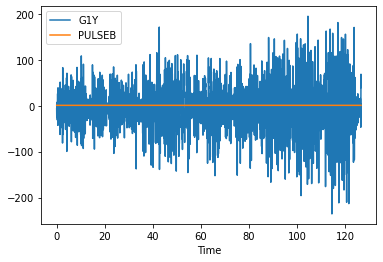

In [0]:
df_parkinsonian.plot(kind='line',x='Time',y=['G1Y','PULSEB'])

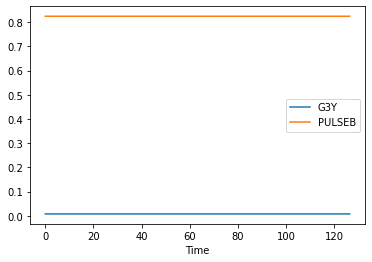

In [0]:
df_parkinsonian.plot(kind='line',x='Time',y=['G3Y','PULSEB'])

### Plotting important axis
- G1 refere-se ao giroscópio fixado no dorso da mão

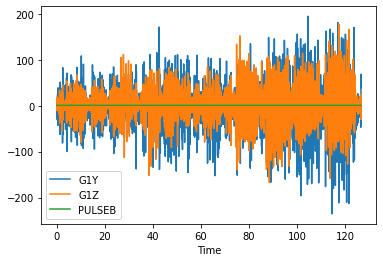

In [0]:
df_parkinsonian.plot(kind='line',x='Time',y=['G1Y','G1Z','PULSEB'])

## Audio Processing

### getting audio from my drive

In [0]:
link_audio = 'https://drive.google.com/open?id=1JVnwDBMkQfYfEmxuIC3hlakZ6tpce9od'
fluf, id = link_audio.split('=')
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('experiment_beeps_between_act_50hz.wav')  

In [0]:
import wave

In [0]:
spf=wave.open('experiment_beeps_between_act_50hz.wav')

In [0]:
#Extract data
signal = spf.readframes(-1)
signal = np.fromstring(signal,"Int16")
fr = spf.getframerate()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)

In [0]:
fr

50

In [0]:
Time = np.linspace(0, len(signal) / fr, num=len(signal))

In [0]:
len(signal)

6011

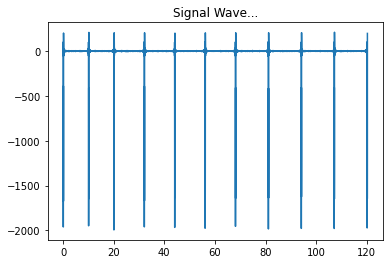

In [0]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, signal)
plt.show()

In [0]:
signal_treated = []
for s in signal:
    if s<-500:
        signal_treated.append(0)
    else:
        signal_treated.append(np.nan)

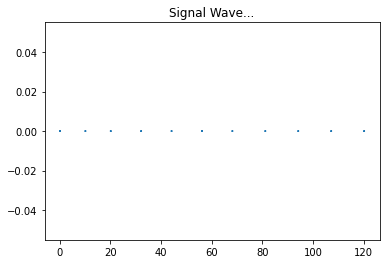

In [0]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, signal_treated)
plt.show()

### Audio signal segmentation & processing

In [0]:
# audio_signal = []
# value=34
# for i in np.arange(0,f,(1/50)):
#     if i==12:
#         audio_signal.append(150)
#     elif i==21:
#         audio_signal.append(150)
#     elif (i==value):
#         audio_signal.append(150)
#         value+=12.2
#     else:
#         audio_signal.append(0)

In [0]:
# import matplotlib.pyplot as plt

In [0]:
# plt.figure(1)
# plt.title("Signal Wave...")
# plt.plot(l, audio_signal)
# plt.show()

In [0]:
# len(audio_signal)

In [0]:
# df_parkinsonian.shape

In [0]:
df_audio = pd.DataFrame(data=signal_treated,columns=['audio_signal'])
df_audio.head()

,audio_signal
0,NaN
1,NaN
2,NaN
3,NaN
4,0.0


In [0]:
len(df_parkinsonian.index)

6327

In [0]:
len(signal_treated)

6011

In [0]:
for i in range(0,150):
    signal_treated.insert(i,np.nan)

In [0]:
for i in range(0,np.abs(len(df_parkinsonian.index)-len(signal_treated))):
    signal_treated.append(np.nan)

In [0]:
len(signal_treated)

6327

In [0]:
df_parkinsonian['audio_signal']=signal_treated

In [0]:
df_parkinsonian.head()

,G1X,G1Y,G1Z,G2X,G2Y,G2Z,G3X,G3Y,G3Z,G4X,G4Y,G4Z,A1X,A1Y,A1Z,A2X,A2Y,A2Z,A3X,A3Y,A3Z,A4X,A4Y,A4Z,M1X,M1Y,M1Z,M2X,M2Y,M2Z,M3X,M3Y,M3Z,M4X,M4Y,M4Z,EMG1,EMG2,PULSEA,PULSEB,Time,audio_signal
178,-1.426719,-6.492714,8.079652,3.898680,2.342260,0.572213,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.252995,-0.488838,-0.704417,-0.325139,-0.219303,-0.843214,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.198764,-0.047700,-0.045747,0.157809,-0.139254,0.015778,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.089647,2.758831,0.825013,0.825013,0.00,NaN
179,-17.723354,-16.090639,14.976730,-0.083925,0.968948,0.007630,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.250919,-0.475166,-0.673899,-0.319280,-0.199649,-0.848707,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.197665,-0.047883,-0.045502,0.160006,-0.140597,0.023224,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.087205,2.758831,0.825013,0.825013,0.02,NaN
180,-29.365988,-25.703822,11.985962,-4.692149,-1.258869,1.335164,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.246403,-0.489815,-0.696971,-0.308782,-0.155337,-0.833570,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.196933,-0.048554,-0.047517,0.157565,-0.137545,0.012360,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.087205,2.758831,0.825013,0.825013,0.04,NaN
181,-22.621500,-23.521782,-3.059434,-11.375601,-1.823453,3.135729,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.292302,-0.516060,-0.811719,-0.336614,-0.176577,-0.883497,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.198581,-0.048310,-0.049592,0.157687,-0.136934,0.022858,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.084764,2.757610,0.825013,0.825013,0.06,NaN
182,4.982071,-18.425269,-7.438773,-5.180438,-0.495918,1.014725,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.310002,-0.451118,-0.927687,-0.351385,-0.121401,-0.884718,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.197177,-0.048127,-0.050141,0.161776,-0.139925,0.016205,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.085985,2.757610,0.825013,0.825013,0.08,NaN


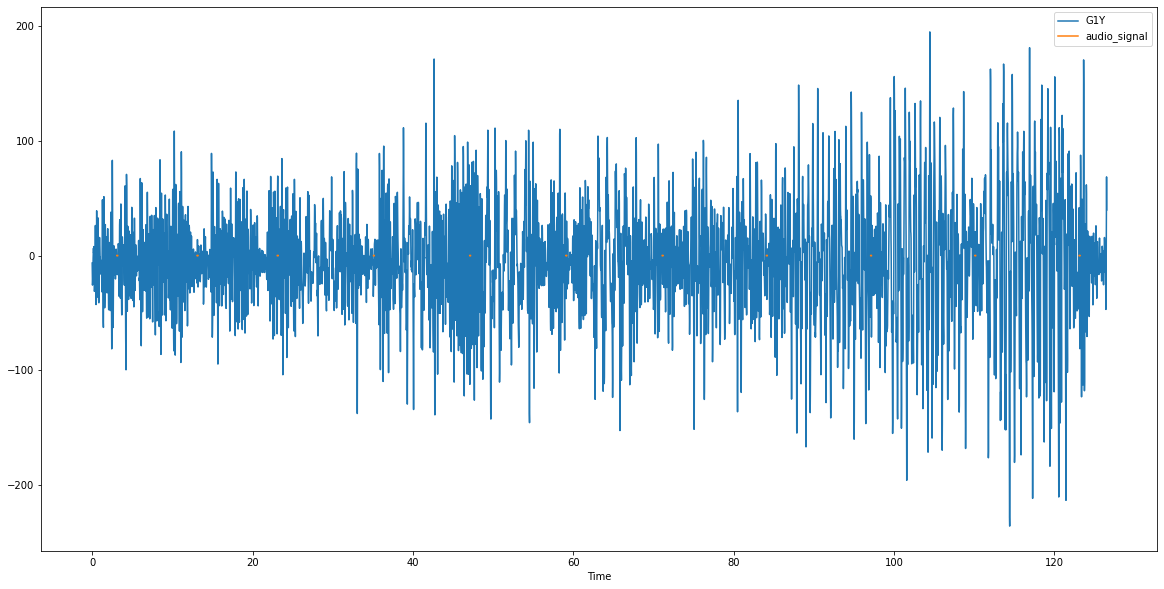

In [0]:
df_parkinsonian.plot(kind='line',x='Time',y=['G1Y','audio_signal'],figsize=(20,10))

# Final Result of Data Preparation
Final dataset plotting with slices of activities made by the subjects according to the article [HAND MOTION QUANTIFICATION USING NON-CONTACT CAPACITIVE SENSORS](https://www.researchgate.net/publication/314086406_HAND_MOTION_QUANTIFICATION_USING_NON-CONTACT_CAPACITIVE_SENSORS) 

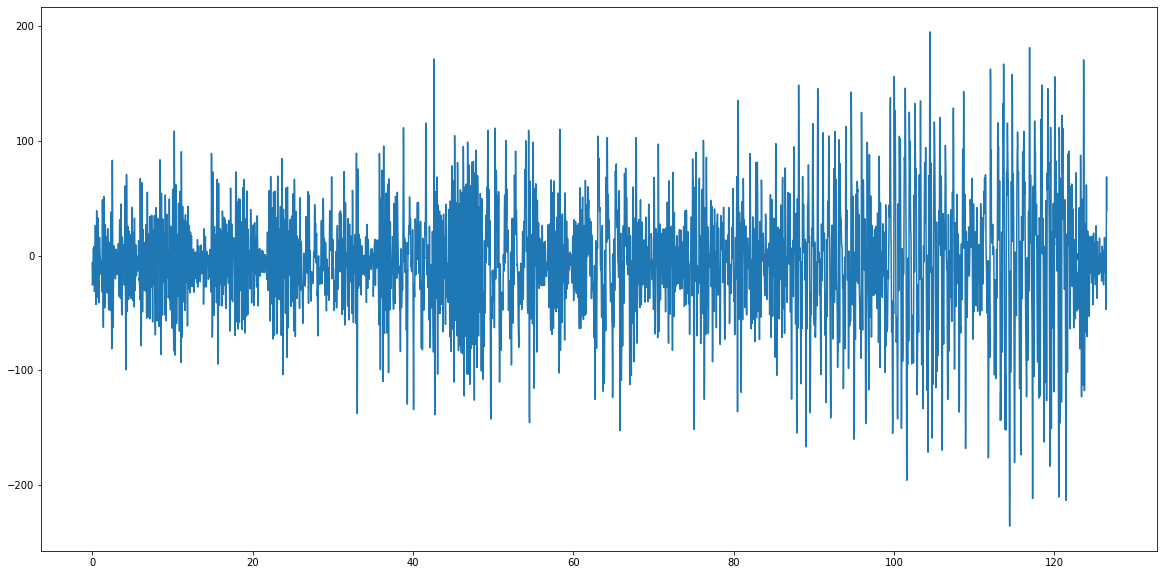

In [0]:
# df_parkinsonian.plot(kind='line',x='Time',y=['G1Y'],figsize=(20,10),color=['k','r'],xlim=[0,f])
# df_parkinsonian.plot(kins='scatter',x='Time',y='audio_signal')
from matplotlib.pyplot import figure

fig = plt.gcf()
fig.set_size_inches(20,10)
plt.plot(df_parkinsonian['Time'],df_parkinsonian['G1Y'])
plt.scatter(df_parkinsonian['Time'],df_parkinsonian['audio_signal'],color='r')
plt.show()

In [0]:
fig.savefig('graph_analysed_'+patient+ncollect+side+'.png', dpi=100)

In [0]:
df_parkinsonian.head()

,G1X,G1Y,G1Z,G2X,G2Y,G2Z,G3X,G3Y,G3Z,G4X,G4Y,G4Z,A1X,A1Y,A1Z,A2X,A2Y,A2Z,A3X,A3Y,A3Z,A4X,A4Y,A4Z,M1X,M1Y,M1Z,M2X,M2Y,M2Z,M3X,M3Y,M3Z,M4X,M4Y,M4Z,EMG1,EMG2,PULSEA,PULSEB,Time,audio_signal
178,-1.426719,-6.492714,8.079652,3.898680,2.342260,0.572213,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.252995,-0.488838,-0.704417,-0.325139,-0.219303,-0.843214,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.198764,-0.047700,-0.045747,0.157809,-0.139254,0.015778,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.089647,2.758831,0.825013,0.825013,0.00,NaN
179,-17.723354,-16.090639,14.976730,-0.083925,0.968948,0.007630,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.250919,-0.475166,-0.673899,-0.319280,-0.199649,-0.848707,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.197665,-0.047883,-0.045502,0.160006,-0.140597,0.023224,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.087205,2.758831,0.825013,0.825013,0.02,NaN
180,-29.365988,-25.703822,11.985962,-4.692149,-1.258869,1.335164,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.246403,-0.489815,-0.696971,-0.308782,-0.155337,-0.833570,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.196933,-0.048554,-0.047517,0.157565,-0.137545,0.012360,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.087205,2.758831,0.825013,0.825013,0.04,NaN
181,-22.621500,-23.521782,-3.059434,-11.375601,-1.823453,3.135729,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.292302,-0.516060,-0.811719,-0.336614,-0.176577,-0.883497,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.198581,-0.048310,-0.049592,0.157687,-0.136934,0.022858,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.084764,2.757610,0.825013,0.825013,0.06,NaN
182,4.982071,-18.425269,-7.438773,-5.180438,-0.495918,1.014725,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.310002,-0.451118,-0.927687,-0.351385,-0.121401,-0.884718,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.197177,-0.048127,-0.050141,0.161776,-0.139925,0.016205,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.085985,2.757610,0.825013,0.825013,0.08,NaN


In [0]:
df_parkinsonian.loc[df_parkinsonian['audio_signal']==0].shape

(55, 42)

In [0]:
task_init_marker = df_parkinsonian.loc[df_parkinsonian['audio_signal']==0]

In [0]:
v = -1
reduced_markers = []
for i in task_init_marker.index:
    if (i-v)>100:
        reduced_markers.append(i)
    v=i
reduced_markers

[332, 832, 1332, 1932, 2532, 3132, 3732, 4382, 5032, 5682, 6332]

In [0]:
for i in df_parkinsonian.index:
        if i not in reduced_markers:
            df_parkinsonian.loc[i,['audio_signal']]=np.nan

In [0]:
df_parkinsonian.loc[df_parkinsonian['audio_signal']==0].shape

(11, 42)

In [0]:
df_parkinsonian.to_csv('/content/drive/My Drive/Projects/PIBIC - Estratégia para visualização de dados/Feature extraction/'+patient+'_'+ncollect+'_'+side+'.csv',index=False)

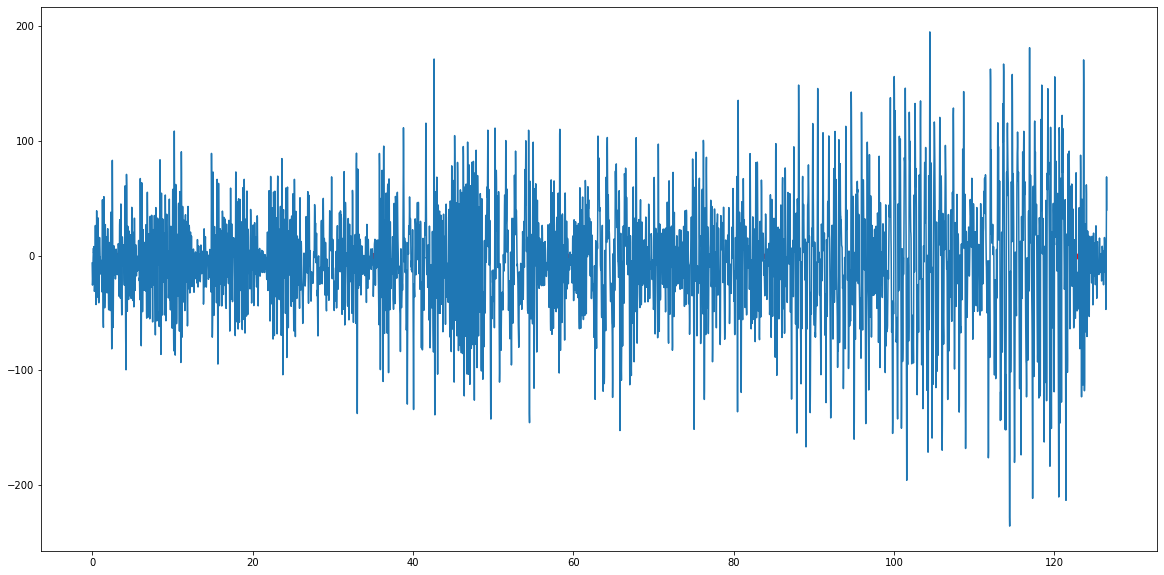

In [0]:
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.plot(df_parkinsonian['Time'],df_parkinsonian['G1Y'])
plt.scatter(df_parkinsonian['Time'],df_parkinsonian['audio_signal'],color='r')
plt.show()